Assigment 3 Exercise 2

In [1]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt
import scipy.stats as ss
from datetime import datetime
import wrds
db = wrds.Connection(wrds_username = 'anita97') 

Loading library list...
Done


a) Download daily returns for Amazon, the market and t-bill (which represents the risk free)

In [169]:
amazon = db.raw_sql("select date, "
                  "ret from crsp.dsf where permno in (14593)"
                  "and date >='2009-01-01' and date<='2018-12-31'")
rm = db.raw_sql("select date, vwretd from crsp.dsi where date >='2009-01-01' and date<='2018-12-31'")
rf = db.raw_sql("select caldt, tdyld from crsp.tfz_dly_rf2 where kytreasnox = 2000061 and caldt  >='2009-01-01' and caldt<='2018-12-31'")

b) plot the rolling window esimate of the beta of the stock using 6-mount data window

In [170]:
# Adjust variables:
name = ['Amazon','Market','T-bill (Risk Free)']

# rename the index column:
amazon.set_index('date') 
rm.set_index('date')
rf.set_index('caldt') 

# rename the value column:
amazon = amazon.rename(columns={'ret':name[0]})
rm = rm.rename(columns={'vwretd':name[1]})
rf = rf.rename(columns={'tdyld':name[2] })
rf = rf.rename(columns={'caldt': 'date'})

# concate variables:
data1 = pd.merge(amazon, rm, on= 'date',validate="one_to_one")
data = pd.merge(data1, rf, on= 'date',validate="one_to_one").set_index("date")
data.index = pd.DatetimeIndex(data.index) # convert index in DataIndex
data.head()

,Amazon,Market,T-bill (Risk Free)
date,,,
2009-01-02,0.063269,0.030505,5.555597e-07
2009-01-05,0.042204,-0.000581,1.250019e-06
2009-01-06,-0.016494,0.011304,2.777787e-07
2009-01-07,-0.021608,-0.030490,7.638953e-07
2009-01-08,0.018569,0.006286,6.944512e-07


In [171]:
display(data.describe())

,Amazon,Market,T-bill (Risk Free)
count,2497.000000,2497.000000,2.497000e+03
mean,0.001222,0.000512,8.838996e-06
std,0.016781,0.010595,1.533754e-05
min,-0.123549,-0.068697,-1.111094e-06
25%,-0.007023,-0.003777,5.555597e-07
50%,0.000970,0.000752,1.944495e-06
75%,0.010226,0.005533,6.458792e-06
max,0.088741,0.069068,6.436352e-05


In [172]:
# Calculate rolling covariance:
sixmounths_data = data.rolling('183D') # 183 days are half a year (6 mounths)
cov_6m = sixmounths_data.cov() # covariance 
cov_6m = cov_6m_data.loc['2009-06-01':'2018-12-31'] # rename data

print('Covariance between Amazon, market and risk free of rolled data (6 mounths):')
cov_6m.head(9)

Covariance between Amazon, market and risk free of rolled data (6 mounths):


Amazon        Market  T-bill (Risk Free)
date                                                                         
2009-06-01 Amazon              7.643375e-04  5.002233e-04       -2.656957e-09
           Market              5.002233e-04  5.779444e-04       -2.787182e-09
           T-bill (Risk Free) -2.656957e-09 -2.787182e-09        3.044690e-12
2009-06-02 Amazon              7.570817e-04  4.952900e-04       -2.655219e-09
           Market              4.952900e-04  5.723690e-04       -2.748932e-09
           T-bill (Risk Free) -2.655219e-09 -2.748932e-09        3.018639e-12
2009-06-03 Amazon              7.500757e-04  4.895847e-04       -2.574328e-09
           Market              4.895847e-04  5.701144e-04       -2.913258e-09
           T-bill (Risk Free) -2.574328e-09 -2.913258e-09        3.000814e-12

Text(0.5, 0, 'Time')

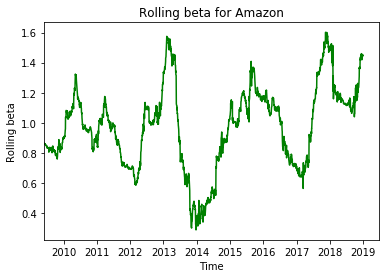

In [173]:
# Calculate the rolling beta

time = [] # x axis
beta = [] # y axis
cov_ma = []
var_m = []
range_index = int(np.divide(len(cov_6m),3))

for i in range(range_index):
    index = i*3 # index+0 is Amazon, index+1 is market, index+2 is the rf
    time.append(cov_6m.index[index][0])
    cov_ma.append(cov_6m.Market.iloc[index]) # index+0 is amazon
    var_m.append(cov_6m.Market.iloc[index+1]) # index+1 is market
    beta.append(np.divide(cov_ma[-1],var_m[-1]))

#plot the rolling beta
plt.plot(time,beta, color='g')
plt.xlim(time[1]) 
plt.title('Rolling beta for Amazon')
plt.ylabel('Rolling beta')
plt.xlabel('Time')

c) Illustate sampling variation: 